# Héritage de classe

## Classe ___Vehicule___ à 3 attributs

In [3]:
class Vehicule:
    def __init__(self, nb_roues, vitesse_max, nb_passagers):
        self.nb_roues = nb_roues
        self.vitesse_max = vitesse_max
        self.nb_passagers = nb_passagers

La classe _Velo_ hérite de _Vehicule_ et tout objet de _Velo_ contient l'attribut supplémentaire _derailleur_.

In [4]:
class Velo(Vehicule):
    def __init__(self, nb_roues, vitesse_max, nb_passagers, derailleur):
        Vehicule.__init__(self, nb_roues, vitesse_max, nb_passagers)
        self.derailleur = derailleur

La classe _Voiture_ hérite de _Vehicule_ et tout objet de _Voiture_ contient l'attribut supplémentaire _nb_portes_.

In [5]:
class Voiture(Vehicule):
    def __init__(self, nb_roues, vitesse_max, nb_passagers, nb_portes):
        Vehicule.__init__(self, nb_roues, vitesse_max, nb_passagers)
        self.nb_portes = nb_portes

Soit une brouette - 1 roue, 5 km/h max, 0 passager

Soit une Peugeot - 4 roues, 160 km/h max,  5 passagers, 3 portes

Soit un VTT - 2 roues, 60 km/h max, 1 passager, dérailleur très cher

In [6]:
brouette = Vehicule(1, 5, 0)
Peugeot = Voiture(4, 160, 5, 3)
VTT = Velo(2, 60, 1, "derailleur_tres_cher")

print(vars(brouette))
print(vars(Peugeot))
print(vars(VTT))


{'nb_roues': 1, 'vitesse_max': 5, 'nb_passagers': 0}
{'nb_roues': 4, 'vitesse_max': 160, 'nb_passagers': 5, 'nb_portes': 3}
{'nb_roues': 2, 'vitesse_max': 60, 'nb_passagers': 1, 'derailleur': 'derailleur_tres_cher'}


## Autre exemple d'héritage

Dans ce qui suit, la classe ___ClasseF___ (classe Fille) hérite de ___ClasseP___ (classe Parent).

Un objet de ClasseP possède l'attribut _a_ et la fonction function_P est identique pour tout objet de ClasseP.

Un objet de ClasseF possède les mêmes attributs que pour ClasseP, avec en plus, l'attribut _b_  et la fonction function_F qui est identique pour tout objet de ClasseF.

In [7]:
class ClasseP:
    def __init__(self, i):
        self.a = i
    def function_P(self):
        print('Classe parent: ClasseP')
    def operation(self,x):
        return(self.a+x)

In [8]:
class ClasseF(ClasseP):
    def __init__(self, i, j):
        ClasseP.__init__(self, i) # ou encore super().__init__(i)
        self.b = j
    def function_F(self):
        print('Classe fille: ClasseF')
    def operation(self,x): # exemple de redéfinition d'une méthode
        return(ClasseP.operation(self,x)+self.b) #ou self.a+x+self.b (utilisation de Classe.operation pour l'exemple)  

_op_ est une instanciation de _ClasseP_.

In [9]:
op = ClasseP(4)
print("op.a =", op.a); op.function_P()

op.a = 4
Classe parent: ClasseP


_of_ est une instance de _ClasseF_. On peut appliquer la fonction function_P à l'objet _of_ de la classe _ClasseF_.

In [10]:
of = ClasseF(2, 1)
print("of.a =", of.a, ", of.b=", of.b); of.function_P(); of.function_F()

of.a = 2 , of.b= 1
Classe parent: ClasseP
Classe fille: ClasseF


La méthode operation de ClasseP est redéfinie dans ClasseF

In [8]:
print(op.operation(3))
print(of.operation(3))

7
6


# scipy

## Nombres complexes et scipy

In [11]:
import scipy as sp
sp.sqrt(-1)

/tmp/ipykernel_96726/3675914051.py:2: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  sp.sqrt(-1)


1j

## Différences numpy/scipy

Comme vous le voyez dans les affichages de jupyter, certaines fonctionalités de scipy vont disparaître dans la version 2.0.0 de scipy (remplacées par numpy.lib.scimath).
Pour le moment, ça existe encore.

In [12]:
sp.sqrt(-1)

/tmp/ipykernel_96726/668060670.py:1: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  sp.sqrt(-1)


1j

In [13]:
sp.log(-2)

/tmp/ipykernel_96726/3061345566.py:1: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  sp.log(-2)


(0.6931471805599453+3.141592653589793j)

Utilisation de numpy.lib.scimath 

In [14]:
import numpy.lib.scimath as nls
print(nls.sqrt(-1) , "et", nls.log(-2))

1j et (0.6931471805599453+3.141592653589793j)


## scipy.linalg

Résolution de système linéaire avec scipy.linalg

In [15]:
import numpy as np
import scipy.linalg as spl
A2 = np.array([[1,2,3], [4,5,6], [7,8,10]])
A1 = np.array([-1,-2, -6])  
x = spl.solve(A2, A1)
print(x); print(type(x))

[-2.66666667  5.33333333 -3.        ]
<class 'numpy.ndarray'>


In [16]:
print(spl.norm(np.dot(A2,x)-A1, np.inf))

8.881784197001252e-16


## scipy.stats

### Loi normale

In [18]:
import scipy.stats as st
x0 = 0.25; m= 3; sigma=1.2
st.norm.pdf(x0, loc=m, scale=sigma) #densité de N(m,sigma) en x=0.25

help(st.norm)

Help on norm_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.norm_gen object>
    A normal continuous random variable.
    
    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.
    
    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf

In [19]:
st.norm.cdf(x0, loc=m, scale=sigma)

0.010962442649170873

In [20]:
st.norm.ppf(x0, loc=m, scale=sigma)

2.1906122997647017

In [21]:
n = 5; st.norm.rvs(size=n, loc=m, scale=sigma)

array([4.37748612, 2.47109847, 4.16672053, 2.58546783, 2.3055353 ])

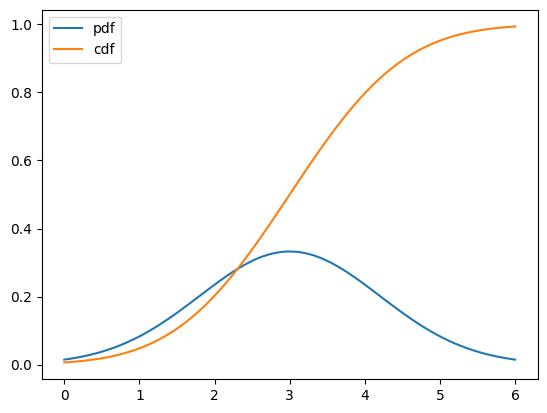

In [22]:
import matplotlib.pyplot as plt
import numpy as np
x= np.linspace(0, 6, 100)
plt.plot(x, st.norm.pdf(x,loc=m, scale=sigma),label='pdf')
plt.plot(x, st.norm.cdf(x,loc=m, scale=sigma),label='cdf')
plt.legend()

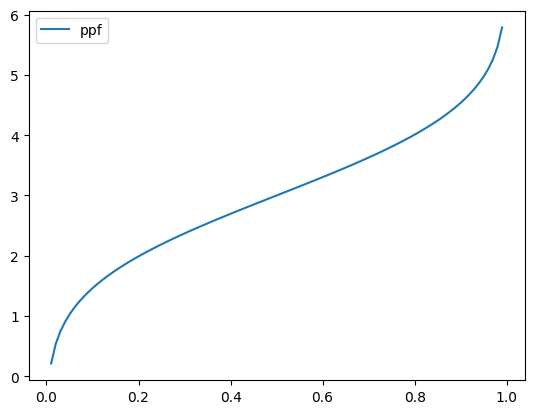

In [23]:
x = np.linspace(0, 1, 100);
plt.plot(x, st.norm.ppf(x,loc=m, scale=sigma),label='ppf')
plt.legend()

### Loi uniforme

In [24]:
a=1; b=5; x0=1.75
st.uniform.pdf(x0, loc=a, scale=(b-a))
#help(st.uniform)

0.25

In [ ]:
st.uniform.cdf(x0, loc=a, scale=(b-a))

In [ ]:
st.uniform.ppf(0.6666, loc=a, scale=(b-a))

In [ ]:
st.uniform.rvs(size=5,loc=a, scale=(b-a))

In [ ]:
x = np.linspace(0, 6, 100)
plt.plot(x, st.uniform.pdf(x,loc=a, scale=(b-a)),label='pdf')
plt.plot(x, st.uniform.cdf(x,loc=a, scale=(b-a)),label='cdf')
plt.legend()

In [ ]:
plt.plot(x, st.uniform.ppf(x,loc=a, scale=(b-a)),label='ppf')
plt.legend()

### Loi exponentielle $\mathcal{E}(\theta)$

In [26]:
from scipy.stats import expon
theta=4
print(expon.pdf(2,  scale=1/theta), 
expon.ppf(0.7,  scale=1/theta),
expon.cdf(2,  scale=1/theta),
expon.rvs(size=n,  scale=1/theta))

0.0013418505116100474 0.300993201081484 0.9996645373720975 [0.05037357 0.04822991 0.18958221 0.18972966 0.25155452]


In [ ]:
x = np.linspace(0, 6, 100)
plt.plot(x, expon.pdf(x,scale=1/theta),label='pdf')
plt.plot(x, expon.cdf(x,scale=1/theta),label='cdf')
plt.legend()

### Loi du $\chi^2$

In [ ]:
from scipy.stats import chi2
#?chi2
k=3
print(chi2.pdf(2,df=k , loc=0, scale=1), 
chi2.ppf(0.7,df=k , loc=0, scale=1),
chi2.cdf(2,df=k ,loc=0, scale=1),
chi2.rvs(df=k, size=n, loc=0, scale=1))

In [ ]:
x = np.linspace(0, 6, 100)
plt.plot(x, chi2.pdf(x,df=2),label='pdf')
plt.plot(x, chi2.cdf(x,df=k),label='cdf')
plt.legend()


### Loi de Poisson

In [ ]:
lbda=2.5; x=np.arange(0,4,0.5)
st.poisson.cdf(x, lbda)

In [ ]:
st.poisson.ppf(0.6666, lbda)

In [ ]:
st.poisson.rvs(5, lbda)

In [ ]:
lbda = 2.0
x=range(10)
plt.plot(x, st.poisson.pmf(x, lbda),'o')
plt.title('Poisson lambda=2')
plt.title('Fonction de masse.'+' Loi de Poisson lambda=2')
plt.xlabel('x')

x = np.arange(-0.4, 7, 0.02)
plt.figure()
plt.plot(x, st.poisson.cdf(x, lbda),'o')
plt.title('Poisson lambda=2')
plt.title('Fonction de repartition.' +' Loi de Poisson lambda=2')
plt.xlabel('x')

plt.figure()
plt.plot(x, st.poisson.ppf(x, lbda),'o')
plt.title('Fonction quantile.' +' Loi de Poisson lambda=2')
plt.xlabel('x')
plt.show()



## scipy.integrate

### Intégration numérique

In [ ]:
import scipy.integrate as spi
import numpy as np
f = lambda x: 4./(1+x**2)

n = 6; x = np.linspace(0, 1, n); y = f(x)
I = spi.simps(y,x) #y = fonction à intégrer, x= intervalle
print("n=6", I, abs(I-sp.pi))

n = 21; x = np.linspace(0, 1, n); y = f(x)
I = spi.simps(y,x)
print("n=21",I, abs(I-sp.pi))

2+2 kdjfhv dr $\sum$

### Résoltion d'EDO

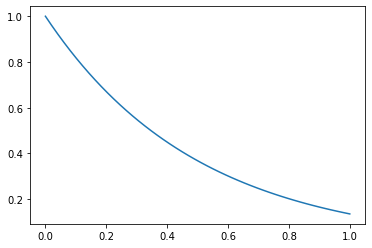

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
     

In [24]:
import scipy.integrate as spi
import matplotlib.pyplot as plt


def f(y, t):  # ordre !!
    return -2*y

t = np.linspace(0, 1, 50)
y0 = np.array([1])
x = spi.odeint(f, y0, t)
plt.plot(t,x)
plt.show()

help(spi.odeint)


## scipy.interpolate

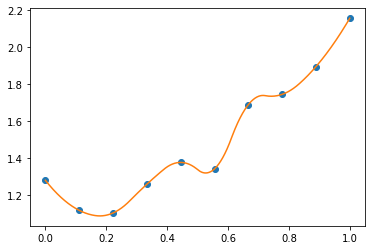

In [22]:
import scipy.interpolate as spi
import numpy as np
import matplotlib.pyplot as plt

n = 10; f0 = lambda x: x**3 + 1
x = np.linspace(0, 1, n)
y = f0(x)

np.random.seed(123) 
eps =np.random.rand(n)*0.4
y = y+ eps  # y contient les x**3+1 perturbés d'un bruit de loi U[0,0.4]
f1 = spi.interpolate.interp1d(x, y,kind='quadratic') #  'zero', 'linear' (défaut), 'quadratic', 'cubic' #degré du spline

x2 = np.linspace(0, 1, 100*n) 
plt.plot(x, y, 'o')
plt.plot(x2, f1(x2))

#?spi.interpolate.interp1d